## Investigating Netflix Movies and Guest Stars in The Office

Manipulating and visualizing movie and TV data.

#### Project Description

You’ll gain experience in an essential data science skill — exploratory data analysis (EDA). This will allow you to perform critical tasks such as manipulating raw data and drawing conclusions from plots you create of the data.

### Project Tasks

1. Loading your friend's data into a dictionary
2. Creating a DataFrame from a dictionary
3. A visual inspection of our data
4. Loading the rest of the data from a CSV
5. Filtering for movies!
6. Creating a scatter plot
7. Digging deeper
8. Marking non-feature films
9. Plotting with color!
10. What next?

<p><strong>The Office!</strong> What started as a British mockumentary series about office culture in 2001 has since spawned ten other variants across the world, including an Israeli version (2010-13), a Hindi version (2019-), and even a French Canadian variant (2006-2007). Of all these iterations (including the original), the American series has been the longest-running, spanning 201 episodes over nine seasons.</p>
<p>In this notebook, we will take a look at a dataset of The Office episodes, and try to understand how the popularity and quality of the series varied over time. To do so, we will use the following dataset: <code>datasets/office_episodes.csv</code>, which was downloaded from Kaggle <a href="https://www.kaggle.com/nehaprabhavalkar/the-office-dataset">here</a>.</p>
<p>This dataset contains information on a variety of characteristics of each episode. In detail, these are:
<br></p>
<div style="background-color: #efebe4; color: #05192d; text-align:left; vertical-align: middle; padding: 15px 25px 15px 25px; line-height: 1.6;">
    <div style="font-size:20px"><b>datasets/office_episodes.csv</b></div>
<ul>
    <li><b>episode_number:</b> Canonical episode number.</li>
    <li><b>season:</b> Season in which the episode appeared.</li>
    <li><b>episode_title:</b> Title of the episode.</li>
    <li><b>description:</b> Description of the episode.</li>
    <li><b>ratings:</b> Average IMDB rating.</li>
    <li><b>votes:</b> Number of votes.</li>
    <li><b>viewership_mil:</b> Number of US viewers in millions.</li>
    <li><b>duration:</b> Duration in number of minutes.</li>
    <li><b>release_date:</b> Airdate.</li>
    <li><b>guest_stars:</b> Guest stars in the episode (if any).</li>
    <li><b>director:</b> Director of the episode.</li>
    <li><b>writers:</b> Writers of the episode.</li>
    <li><b>has_guests:</b> True/False column for whether the episode contained guest stars.</li>
    <li><b>scaled_ratings:</b> The ratings scaled from 0 (worst-reviewed) to 1 (best-reviewed).</li>
</ul>
    </div>

In [1]:
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('datasets/office_episodes.csv')

In [3]:
df.head(3)

,episode_number,season,episode_title,description,ratings,votes,viewership_mil,duration,release_date,guest_stars,director,writers,has_guests,scaled_ratings
0,0,1,Pilot,The premiere episode introduces the boss and s...,7.5,4936,11.2,23,2005-03-24,NaN,Ken Kwapis,Ricky Gervais |Stephen Merchant and Greg Daniels,False,0.28125
1,1,1,Diversity Day,Michael's off color remark puts a sensitivity ...,8.3,4801,6.0,23,2005-03-29,NaN,Ken Kwapis,B. J. Novak,False,0.53125
2,2,1,Health Care,Michael leaves Dwight in charge of picking the...,7.8,4024,5.8,22,2005-04-05,NaN,Ken Whittingham,Paul Lieberstein,False,0.37500


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 188 entries, 0 to 187
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   episode_number  188 non-null    int64  
 1   season          188 non-null    int64  
 2   episode_title   188 non-null    object 
 3   description     188 non-null    object 
 4   ratings         188 non-null    float64
 5   votes           188 non-null    int64  
 6   viewership_mil  188 non-null    float64
 7   duration        188 non-null    int64  
 8   release_date    188 non-null    object 
 9   guest_stars     29 non-null     object 
 10  director        188 non-null    object 
 11  writers         188 non-null    object 
 12  has_guests      188 non-null    bool   
 13  scaled_ratings  188 non-null    float64
dtypes: bool(1), float64(3), int64(4), object(6)
memory usage: 14.9+ KB


In [5]:
df['episode_number'].unique(), df['season'].unique()

(array([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,
         13,  14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,
         26,  27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,
         39,  40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,
         52,  53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,
         65,  66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,
         78,  79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,
         91,  92,  93,  94,  95,  96,  97,  98,  99, 100, 101, 102, 103,
        104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116,
        117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129,
        130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142,
        143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155,
        156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168,
        169, 170, 171, 172, 173, 174, 175, 176, 177

In [6]:
# df.drop(columns='guest_stars', axis=1, inplace=True)

### Plotting each season rating

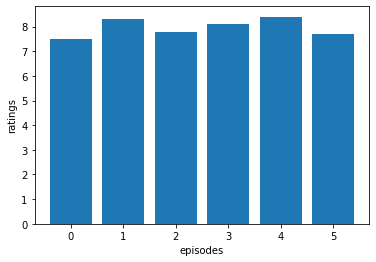

In [7]:
# season 1 ratings

seas_1_ep = df.groupby('season').get_group(1)['episode_number']
seas_1_rate = df.groupby('season').get_group(1)['ratings']


plt.bar(x=seas_1_ep, height=seas_1_rate)
plt.xlabel('episodes')
plt.ylabel('ratings')
plt.show()

### subplotting episodes_rating of specific season

In [8]:
rating_df = df[['season', 'episode_number', 'ratings', 'scaled_ratings']]

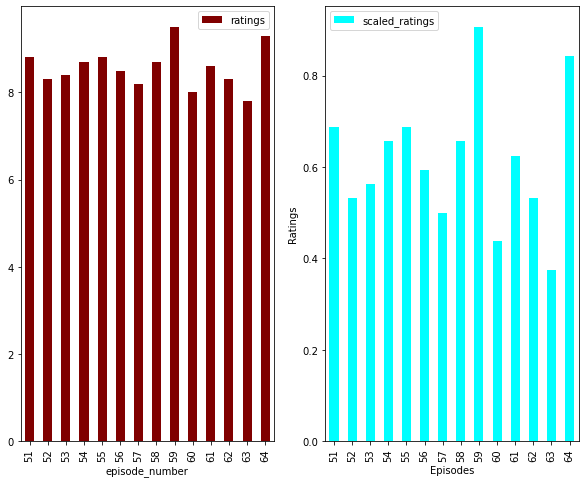

In [9]:
def plot_ratings(season_number):
    
    fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(10,8))
    
    ax = rating_df.groupby('season').get_group(season_number).plot.bar('episode_number', 'ratings', color='maroon', ax=axes[0])
    ax = rating_df.groupby('season').get_group(season_number).plot.bar('episode_number', 'scaled_ratings', color='cyan', ax=axes[1])

    ax.set_xlabel('Episodes')
    ax.set_ylabel('Ratings')
    
    return fig, ax
fig, ax = plot_ratings(4)

## scatter plot 

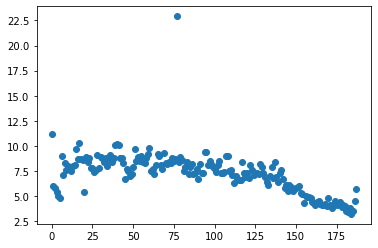

In [10]:
plt.scatter(x=df['episode_number'], y=df['viewership_mil'], cmap=df['scaled_ratings'])

#### Extending above graph with 'scaled_ratings' colors

In [11]:
col = []
for i in df['scaled_ratings']:
    if i < 0.25:
        col.append('red')
    elif i  >= 0.25 and i < 0.50:
        col.append('orange')
    elif i >= 0.50 and i < 0.75:
        col.append('lightgreen')
    elif i >= 0.75:
        col.append('darkgreen')

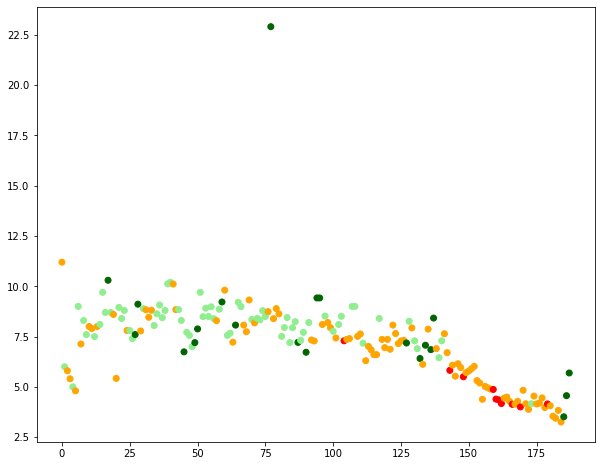

In [12]:
plt.figure(figsize=(10, 8))
plt.scatter(x=df['episode_number'], y=df['viewership_mil'], cmap=df['scaled_ratings'], c=col)

#### Extending above graph with size of 'has_guests' column

In [13]:
size = []
for i in df['has_guests']:
    if i == True:
        size.append(250)
    else:
        size.append(25)

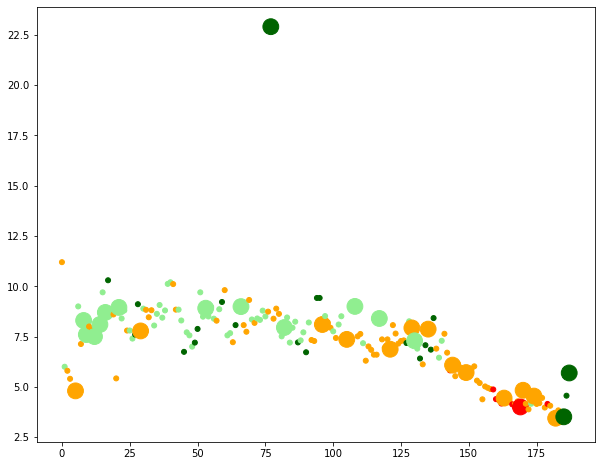

In [14]:
plt.figure(figsize=(10, 8))
plt.scatter(x=df['episode_number'], y=df['viewership_mil'], cmap=df['scaled_ratings'], s=size, c=col)

#### Adding title and labels

Text(0, 0.5, 'Viewership (Millions)')

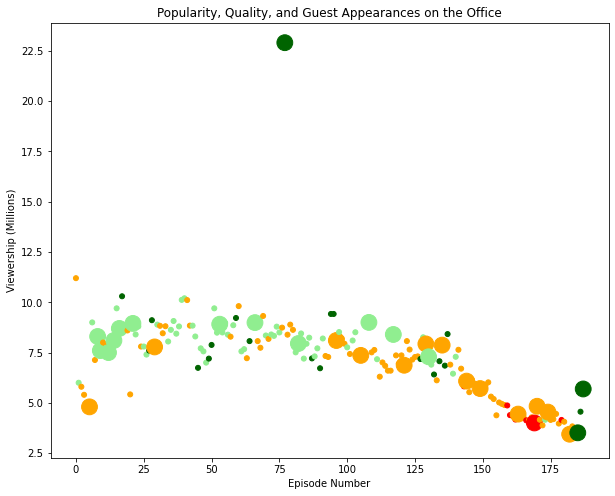

In [15]:
plt.figure(figsize=(10, 8))
plt.scatter(x=df['episode_number'], y=df['viewership_mil'], cmap=df['scaled_ratings'], s=size, c=col)
plt.title('Popularity, Quality, and Guest Appearances on the Office', loc = 'center')
plt.xlabel('Episode Number')
plt.ylabel('Viewership (Millions)')

In [16]:
df.head(3)

,episode_number,season,episode_title,description,ratings,votes,viewership_mil,duration,release_date,guest_stars,director,writers,has_guests,scaled_ratings
0,0,1,Pilot,The premiere episode introduces the boss and s...,7.5,4936,11.2,23,2005-03-24,NaN,Ken Kwapis,Ricky Gervais |Stephen Merchant and Greg Daniels,False,0.28125
1,1,1,Diversity Day,Michael's off color remark puts a sensitivity ...,8.3,4801,6.0,23,2005-03-29,NaN,Ken Kwapis,B. J. Novak,False,0.53125
2,2,1,Health Care,Michael leaves Dwight in charge of picking the...,7.8,4024,5.8,22,2005-04-05,NaN,Ken Whittingham,Paul Lieberstein,False,0.37500


### most views of the guest_stars

In [22]:
highest_view = max(df['viewership_mil'])
data = df.loc[df['viewership_mil'] == highest_view]
data['guest_stars']

77    Cloris Leachman, Jack Black, Jessica Alba
Name: guest_stars, dtype: object

#### checking most guest apperance

<AxesSubplot:xlabel='count', ylabel='guest_stars'>

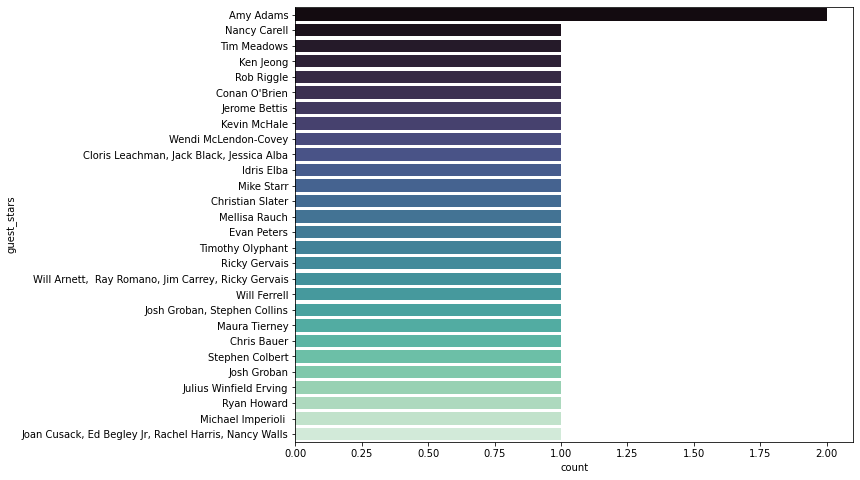

In [17]:
plt.figure(figsize=(10, 8))
sns.countplot(y='guest_stars', data=df, palette='mako')